In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
dfr = pd.read_csv('week 4 - Nashville_housing_data.csv') #dataset loaded
dfr.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [3]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [4]:
print(dfr.columns)

Index(['Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
       'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference',
       'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'State',
       'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
       'Building Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value'],
      dtype='object')


In [5]:
dfr = dfr.drop(['Unnamed: 0', 'Parcel ID', 'Suite/ Condo   #','Legal Reference','Property Address'], axis = 1)

In [6]:
dfr.head()

,Land Use,Property City,Sale Date,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,Acreage,Tax District,Neighborhood,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,NASHVILLE,1/11/2013,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,SINGLE FAMILY,NASHVILLE,1/18/2013,No,No,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,SINGLE FAMILY,NASHVILLE,1/18/2013,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,SINGLE FAMILY,NASHVILLE,1/23/2013,No,No,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,SINGLE FAMILY,NASHVILLE,1/4/2013,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [7]:
for i in dfr.select_dtypes(include="object").columns:
    print(dfr[i].value_counts())
    print("***"*10)

Land Use
SINGLE FAMILY             21390
DUPLEX                     1190
RESIDENTIAL COMBO/MISC       37
QUADPLEX                     34
Name: count, dtype: int64
******************************
Property City
NASHVILLE         18010
MADISON            1146
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         824
GOODLETTSVILLE      435
BRENTWOOD           158
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: count, dtype: int64
******************************
Sale Date
4/29/2016    111
6/30/2016    105
6/28/2013     99
7/31/2015     88
3/31/2016     87
            ... 
2/16/2013      1
4/23/2016      1
11/1/2014      1
6/9/2013       1
8/29/2015      1
Name: count, Length: 1044, dtype: int64
******************************
Sold As Vacant
No     22517
Yes      134
Name: count, dtype: int64
******************************
Multiple Parcels Involved in Sale
No     22183
Yes      468
Name: count, dtype: int64
******************************
City
NASHVIL

In [8]:
dfr = dfr[dfr['Property City'] == dfr['City']]

In [9]:
for i in dfr.select_dtypes(include="object").columns:
    print(dfr[i].value_counts())
    print("***"*10)

Land Use
SINGLE FAMILY             21387
DUPLEX                     1190
RESIDENTIAL COMBO/MISC       37
QUADPLEX                     34
Name: count, dtype: int64
******************************
Property City
NASHVILLE         18010
MADISON            1146
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         824
GOODLETTSVILLE      435
BRENTWOOD           157
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: count, dtype: int64
******************************
Sale Date
4/29/2016     111
6/30/2016     105
6/28/2013      99
7/31/2015      88
3/31/2016      87
             ... 
11/1/2014       1
11/29/2013      1
12/6/2015       1
12/5/2015       1
11/11/2013      1
Name: count, Length: 1044, dtype: int64
******************************
Sold As Vacant
No     22514
Yes      134
Name: count, dtype: int64
******************************
Multiple Parcels Involved in Sale
No     22180
Yes      468
Name: count, dtype: int64
******************************
C

In [10]:
dfr.columns

Index(['Land Use', 'Property City', 'Sale Date', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'City', 'State', 'Acreage',
       'Tax District', 'Neighborhood', 'Land Value', 'Building Value',
       'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall',
       'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value'],
      dtype='object')

In [11]:
dfr = dfr.drop(['Property City','State'], axis = 1)

In [12]:
# Convert 'Sale Date' to datetime format
dfr['Sale Date'] = pd.to_datetime(dfr['Sale Date'])
# Extract year, month, and day features
dfr['Sale Year'] = dfr['Sale Date'].dt.year
dfr['Sale Month'] = dfr['Sale Date'].dt.month
dfr['Sale Day'] = dfr['Sale Date'].dt.day
dfr = dfr.drop('Sale Date', axis=1)

In [13]:
for i in dfr.select_dtypes(include="object").columns:
    print(dfr[i].value_counts())
    print("***"*10)

Land Use
SINGLE FAMILY             21387
DUPLEX                     1190
RESIDENTIAL COMBO/MISC       37
QUADPLEX                     34
Name: count, dtype: int64
******************************
Sold As Vacant
No     22514
Yes      134
Name: count, dtype: int64
******************************
Multiple Parcels Involved in Sale
No     22180
Yes      468
Name: count, dtype: int64
******************************
City
NASHVILLE         18010
MADISON            1146
ANTIOCH            1133
HERMITAGE           913
OLD HICKORY         824
GOODLETTSVILLE      435
BRENTWOOD           157
WHITES CREEK         13
JOELTON              11
MOUNT JULIET          6
Name: count, dtype: int64
******************************
Tax District
URBAN SERVICES DISTRICT      17494
GENERAL SERVICES DISTRICT     3881
CITY OF OAK HILL               349
CITY OF FOREST HILLS           345
CITY OF GOODLETTSVILLE         344
CITY OF BELLE MEADE            214
CITY OF BERRY HILL              21
Name: count, dtype: int64
*****

In [14]:
dfr.head()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Finished Area,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Sale Year,Sale Month,Sale Day
0,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127,32000,134400,1149.00000,...,1941,BRICK,C,2.0,1.0,0.0,Over,2013,1,11
1,SINGLE FAMILY,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126,34000,157800,2090.82495,...,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over,2013,1,18
2,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000,243700,2145.60001,...,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under,2013,1,18
3,SINGLE FAMILY,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130,25000,138100,1969.00000,...,1910,FRAME,C,2.0,1.0,0.0,Under,2013,1,23
4,SINGLE FAMILY,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000,86100,1037.00000,...,1945,FRAME,C,2.0,1.0,0.0,Under,2013,1,4


In [15]:
dfr['Age at Sale'] = dfr['Sale Year'] - dfr['Year Built']

In [16]:
dfr.columns

Index(['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',
       'City', 'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
       'Building Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value', 'Sale Year', 'Sale Month', 'Sale Day',
       'Age at Sale'],
      dtype='object')

In [17]:
dfr = dfr.drop(['Sale Year','Year Built','Sale Month','Sale Day'], axis = 1)

In [18]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22648 entries, 0 to 22650
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           22648 non-null  object 
 1   Sold As Vacant                     22648 non-null  object 
 2   Multiple Parcels Involved in Sale  22648 non-null  object 
 3   City                               22648 non-null  object 
 4   Acreage                            22648 non-null  float64
 5   Tax District                       22648 non-null  object 
 6   Neighborhood                       22648 non-null  int64  
 7   Land Value                         22648 non-null  int64  
 8   Building Value                     22648 non-null  int64  
 9   Finished Area                      22647 non-null  float64
 10  Foundation Type                    22647 non-null  object 
 11  Exterior Wall                      22648 non-null  object 


In [19]:
dfr.isnull().sum()/dfr.shape[0]*100 #To check the percentage of missing data per feature

Land Use                             0.000000
Sold As Vacant                       0.000000
Multiple Parcels Involved in Sale    0.000000
City                                 0.000000
Acreage                              0.000000
Tax District                         0.000000
Neighborhood                         0.000000
Land Value                           0.000000
Building Value                       0.000000
Finished Area                        0.004415
Foundation Type                      0.004415
Exterior Wall                        0.000000
Grade                                0.000000
Bedrooms                             0.013246
Full Bath                            0.004415
Half Bath                            0.476863
Sale Price Compared To Value         0.000000
Age at Sale                          0.000000
dtype: float64

In [20]:
dfr = dfr[[col for col in dfr.columns if col != 'Sale Price Compared To Value'] + ['Sale Price Compared To Value']]

In [21]:
from sklearn.impute import KNNImputer  #KNN Imputer 
impute = KNNImputer()
import warnings
warnings.filterwarnings('ignore')

for i in dfr.select_dtypes(include = 'number').columns: #loop to apply the imputer
    if i == 'Response':
        continue
    dfr[i]=impute.fit_transform(dfr[[i]])

In [22]:
dfr = dfr.dropna()

In [23]:
dfr.isnull().sum()/dfr.shape[0]*100 #To check the percentage of missing data per feature

Land Use                             0.0
Sold As Vacant                       0.0
Multiple Parcels Involved in Sale    0.0
City                                 0.0
Acreage                              0.0
Tax District                         0.0
Neighborhood                         0.0
Land Value                           0.0
Building Value                       0.0
Finished Area                        0.0
Foundation Type                      0.0
Exterior Wall                        0.0
Grade                                0.0
Bedrooms                             0.0
Full Bath                            0.0
Half Bath                            0.0
Age at Sale                          0.0
Sale Price Compared To Value         0.0
dtype: float64

In [24]:
dfr.duplicated().sum()

558

In [25]:
dfr = dfr.drop_duplicates()

In [26]:
dfr.shape

(22089, 18)

In [27]:
# Function to calculate the percentage of outliers in a single column
def calculate_outlier_percentage(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    percentage = len(outliers) / len(column) * 100
    return percentage

# Iterate over each numerical column
for column in dfr.select_dtypes(include="number").columns:
    outlier_percentage = calculate_outlier_percentage(dfr[column])
    print(f"Percentage of outliers in '{column}': {outlier_percentage:.2f}%")

Percentage of outliers in 'Acreage': 13.57%
Percentage of outliers in 'Neighborhood': 0.00%
Percentage of outliers in 'Land Value': 17.79%
Percentage of outliers in 'Building Value': 8.54%
Percentage of outliers in 'Finished Area': 6.08%
Percentage of outliers in 'Bedrooms': 1.47%
Percentage of outliers in 'Full Bath': 5.95%
Percentage of outliers in 'Half Bath': 0.10%
Percentage of outliers in 'Age at Sale': 0.67%


In [28]:
numerical_columns = dfr.select_dtypes(include='number').columns
def cap_outliers_iqr(data, columns, threshold=0.9):
    updated_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
    
    for column in columns:
        Q1 = updated_data[column].quantile(0.25)
        Q3 = updated_data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to cap outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Cap outliers and update the DataFrame
        updated_data[column] = updated_data[column].clip(lower_bound, upper_bound)

    return updated_data

# Apply the function to cap outliers
dfr = cap_outliers_iqr(dfr, columns=numerical_columns)

In [29]:
# Define your filter conditions

conditions = {
    'City': ['NASHVILLE'],
    'Land Use' :['SINGLE FAMILY','DUPLEX'],
        'Foundation Type': ['CRAWL', 'FULL BSMT', 'PT BSMT', 'SLAB'],
    'Exterior Wall': ['BRICK', 'FRAME', 'BRICK/FRAME', 'STONE'],
    'Tax District': ['URBAN SERVICES DISTRICT','GENERAL SERVICES DISTRICT']
    
    }


# Apply filters
dfr = dfr.copy()
for column, values in conditions.items():
    dfr = dfr[dfr[column].isin(values)]
    
for i in dfr.select_dtypes(include="object").columns:
    print(dfr[i].value_counts())
    print("***"*10)

Land Use
SINGLE FAMILY    15412
DUPLEX             868
Name: count, dtype: int64
******************************
Sold As Vacant
No     16171
Yes      109
Name: count, dtype: int64
******************************
Multiple Parcels Involved in Sale
No     15971
Yes      309
Name: count, dtype: int64
******************************
City
NASHVILLE    16280
Name: count, dtype: int64
******************************
Tax District
URBAN SERVICES DISTRICT      15455
GENERAL SERVICES DISTRICT      825
Name: count, dtype: int64
******************************
Foundation Type
CRAWL        10466
FULL BSMT     2652
PT BSMT       2323
SLAB           839
Name: count, dtype: int64
******************************
Exterior Wall
BRICK          8523
FRAME          6309
BRICK/FRAME    1179
STONE           269
Name: count, dtype: int64
******************************
Grade
C       11544
B        2763
D        1451
A         321
X         161
E          40
Name: count, dtype: int64
******************************
Sale 

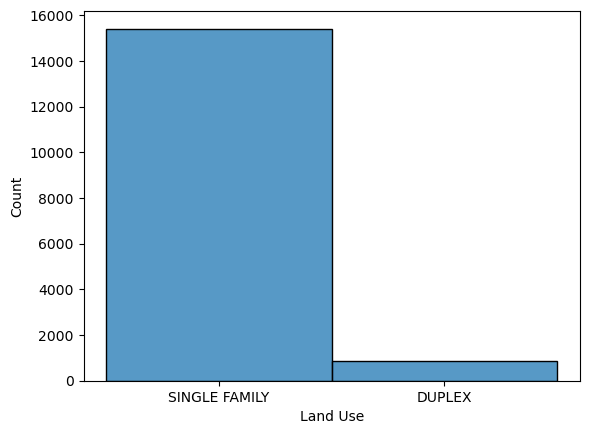

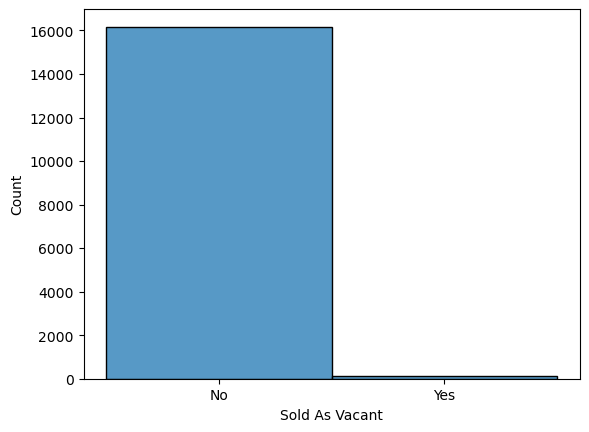

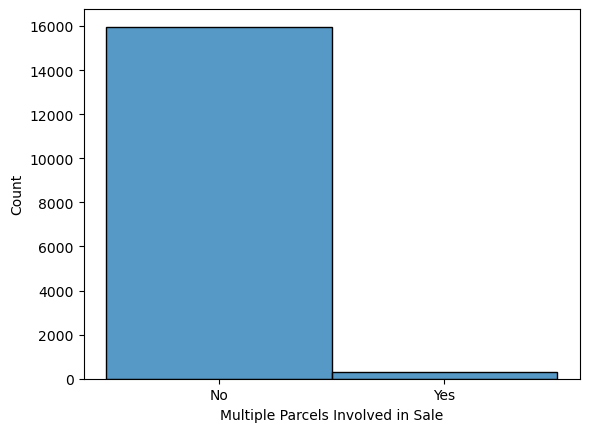

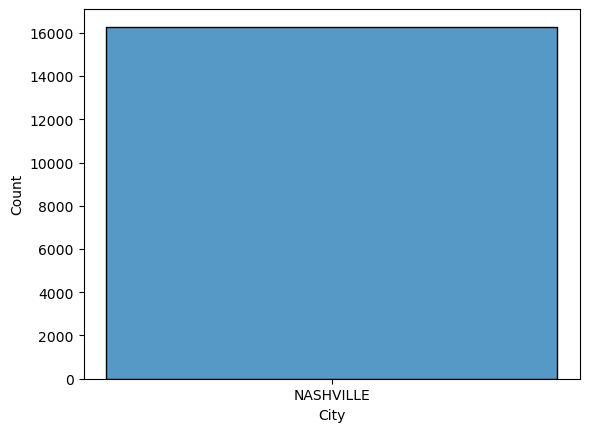

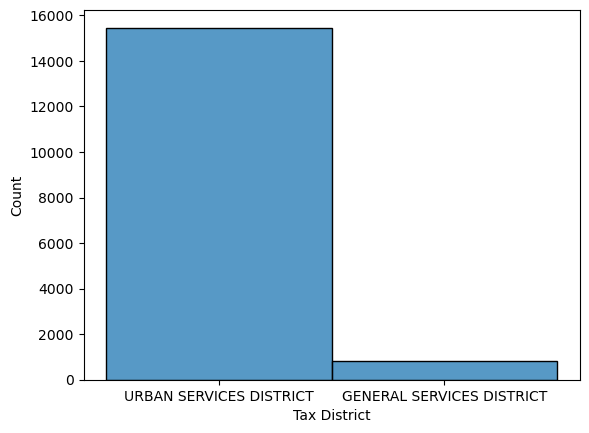

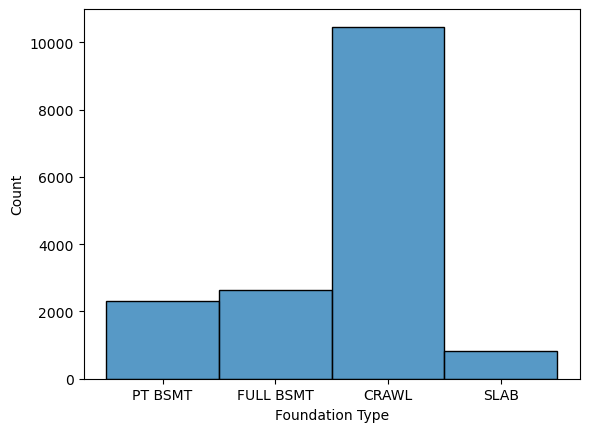

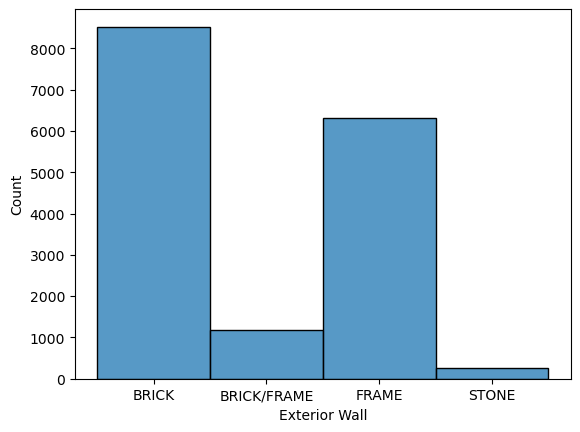

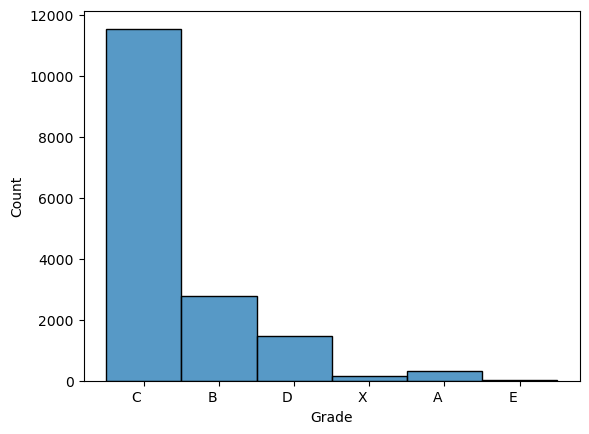

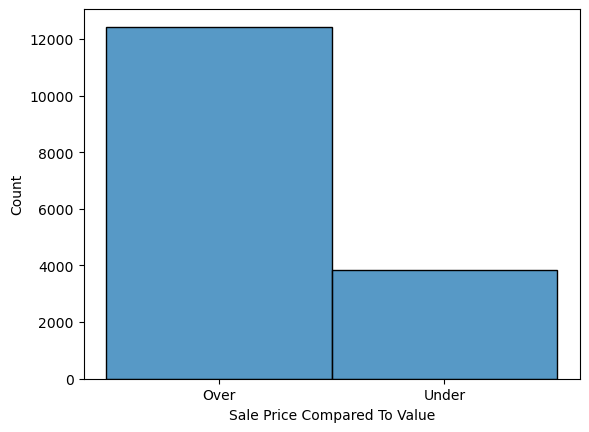

In [30]:
for i in dfr.select_dtypes(include="object").columns: #histogram of all numerical columns
    sns.histplot(data=dfr,x=i)
    plt.show()

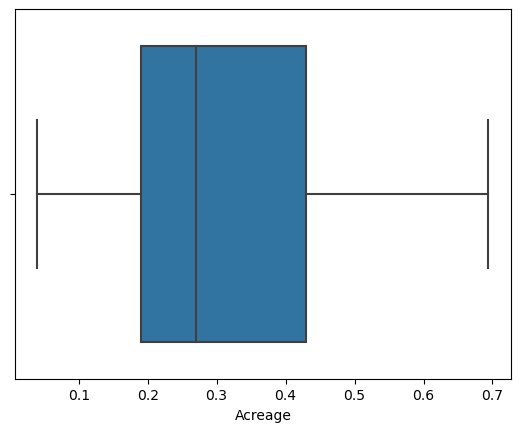

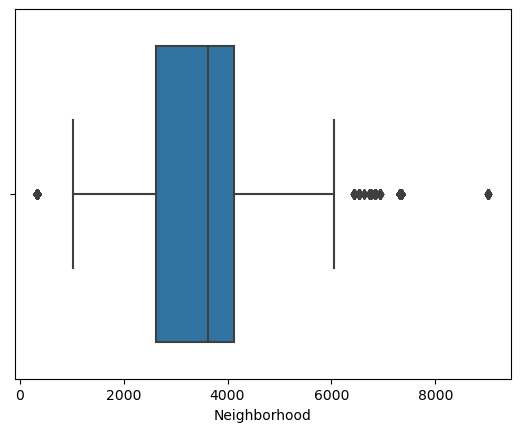

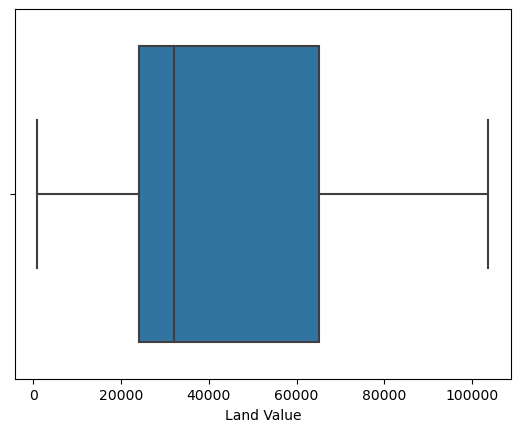

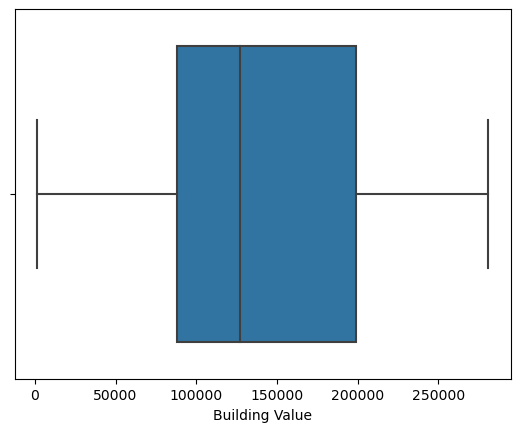

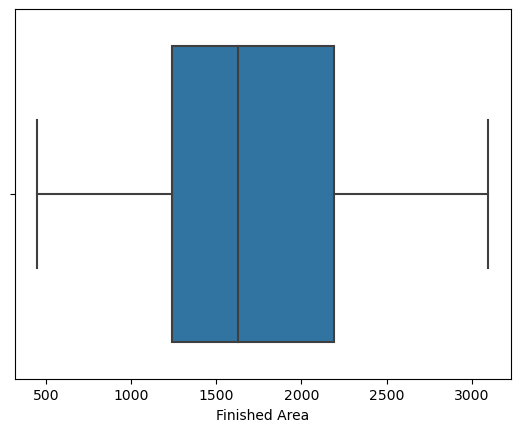

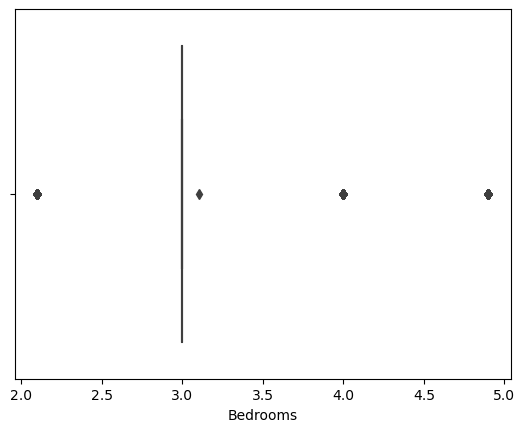

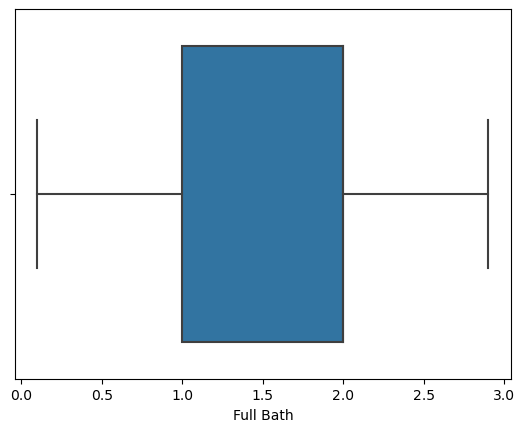

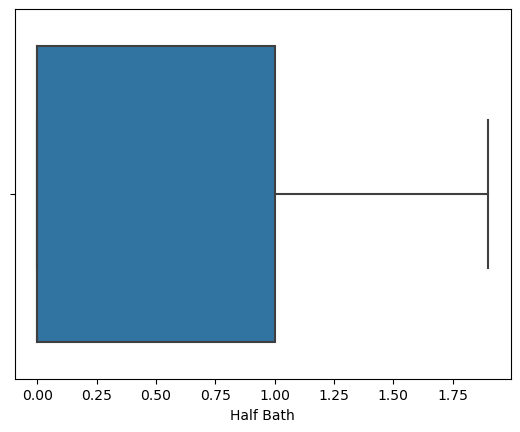

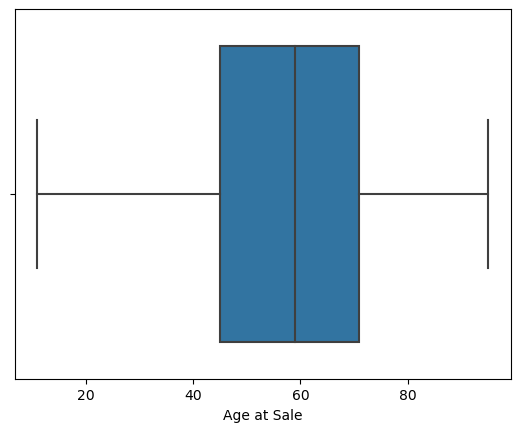

In [31]:
for i in dfr.select_dtypes(include="number").columns: #histogram of all numerical columns
    sns.boxplot(data=dfr,x=i)
    plt.show()

In [32]:
dfr.describe()

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Bedrooms,Full Bath,Half Bath,Age at Sale
count,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,0.327704,3693.064478,46489.678256,146976.975430,1758.662125,3.067789,1.741369,0.268745,55.909767
std,0.180902,1672.103360,32366.769367,75048.790812,669.473389,0.731684,0.701249,0.465552,23.629078
min,0.040000,340.900000,900.000000,1600.000000,450.000000,2.100000,0.100000,0.000000,11.000000
25%,0.190000,2626.000000,24000.000000,88000.000000,1238.000000,3.000000,1.000000,0.000000,45.000000
50%,0.270000,3626.000000,32000.000000,127200.000000,1627.000000,3.000000,2.000000,0.000000,59.000000
75%,0.430000,4131.000000,65000.000000,199300.000000,2189.125000,3.000000,2.000000,1.000000,71.000000
max,0.694000,9018.100000,103700.000000,281030.000000,3096.800000,4.900000,2.900000,1.900000,95.000000


In [33]:
dfr.describe(include ='object')

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Tax District,Foundation Type,Exterior Wall,Grade,Sale Price Compared To Value
count,16280,16280,16280,16280,16280,16280,16280,16280,16280
unique,2,2,2,1,2,4,4,6,2
top,SINGLE FAMILY,No,No,NASHVILLE,URBAN SERVICES DISTRICT,CRAWL,BRICK,C,Over
freq,15412,16171,15971,16280,15455,10466,8523,11544,12429


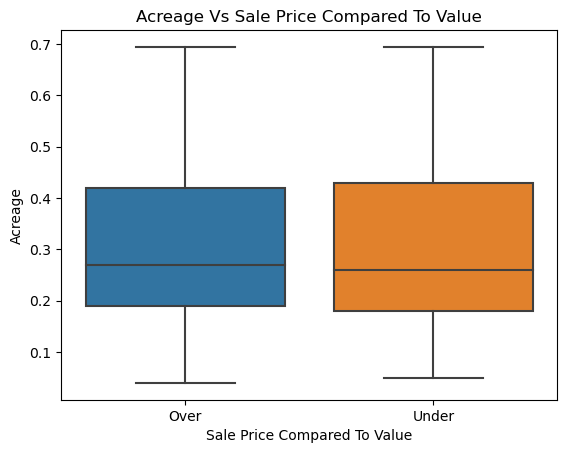

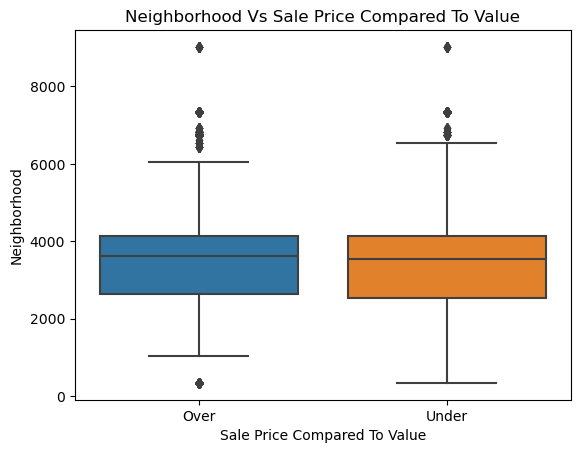

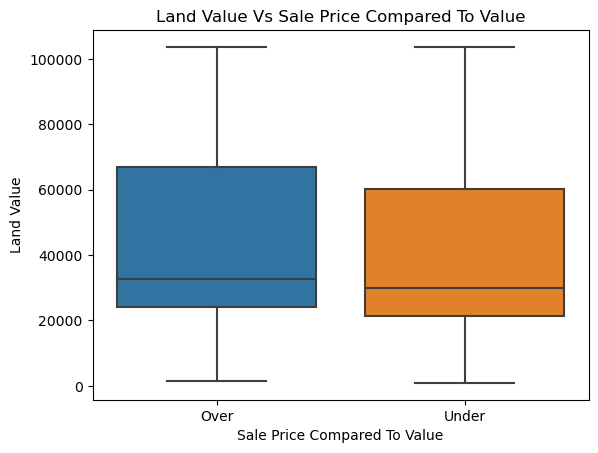

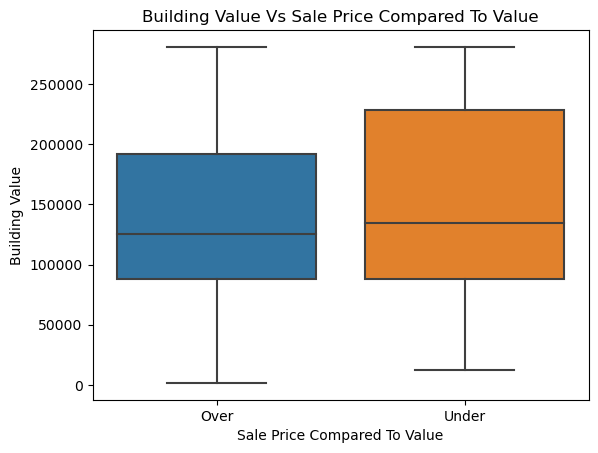

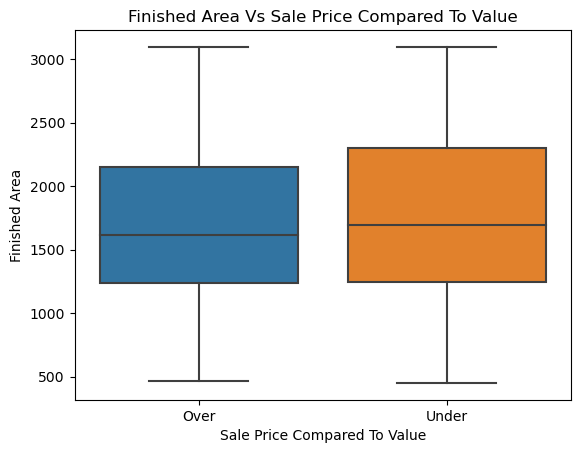

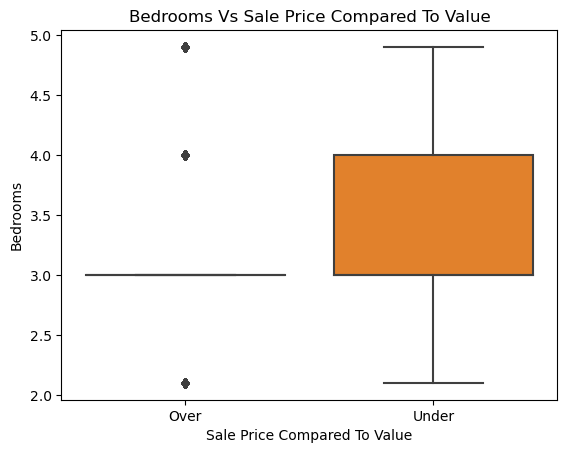

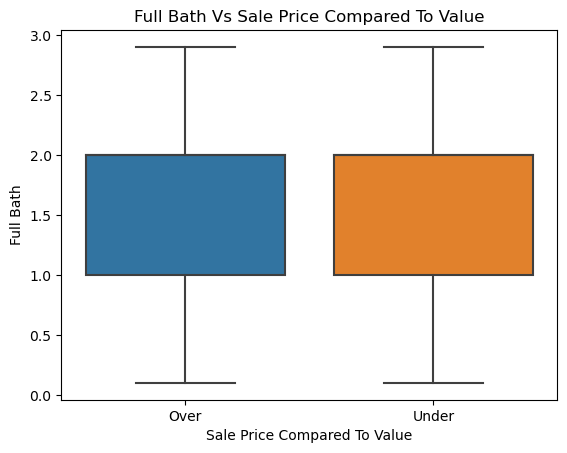

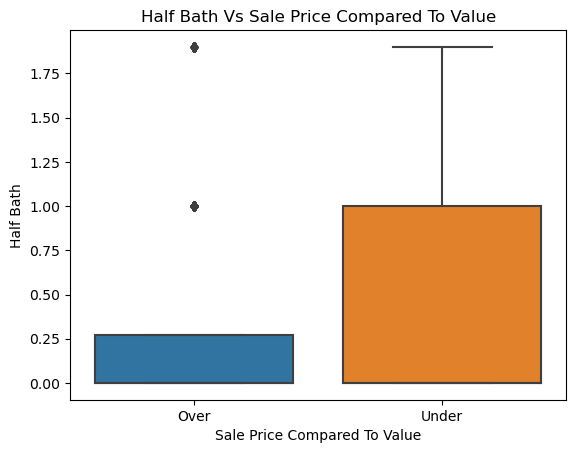

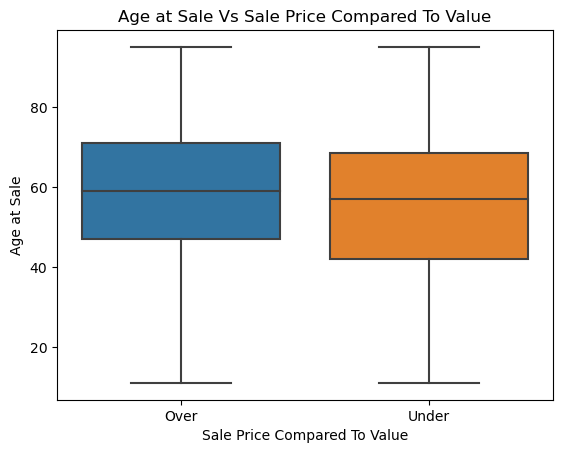

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in numerical_columns:
    sns.boxplot(data=dfr, x='Sale Price Compared To Value', y=col)
    plt.title(f'{col} Vs Sale Price Compared To Value')
    plt.show()


In [35]:
# Check for constant values in all variables
constant_columns = dfr.columns[dfr.nunique() == 1]
print("Columns with constant values:", constant_columns)


Columns with constant values: Index(['City'], dtype='object')


In [36]:
dfr = dfr.drop(['Half Bath','Tax District','City','Neighborhood'], axis = 1)

In [37]:
dfr_numeric = dfr.select_dtypes(include="number")
dfr_numeric

,Acreage,Land Value,Building Value,Finished Area,Bedrooms,Full Bath,Age at Sale
0,0.17,32000.0,134400.0,1149.00000,2.1,1.0,72.0
2,0.17,25000.0,243700.0,2145.60001,4.0,2.0,65.0
3,0.34,25000.0,138100.0,1969.00000,2.1,1.0,95.0
4,0.17,25000.0,86100.0,1037.00000,2.1,1.0,68.0
5,0.20,16000.0,68100.0,1216.00000,2.1,1.0,81.0
...,...,...,...,...,...,...,...
22631,0.29,24000.0,106500.0,2146.00000,3.0,2.0,51.0
22632,0.25,24000.0,104700.0,1911.00000,3.0,2.0,44.0
22634,0.25,22500.0,107300.0,1888.00000,3.0,2.9,29.0
22649,0.15,40000.0,204100.0,1637.00000,3.0,2.0,12.0


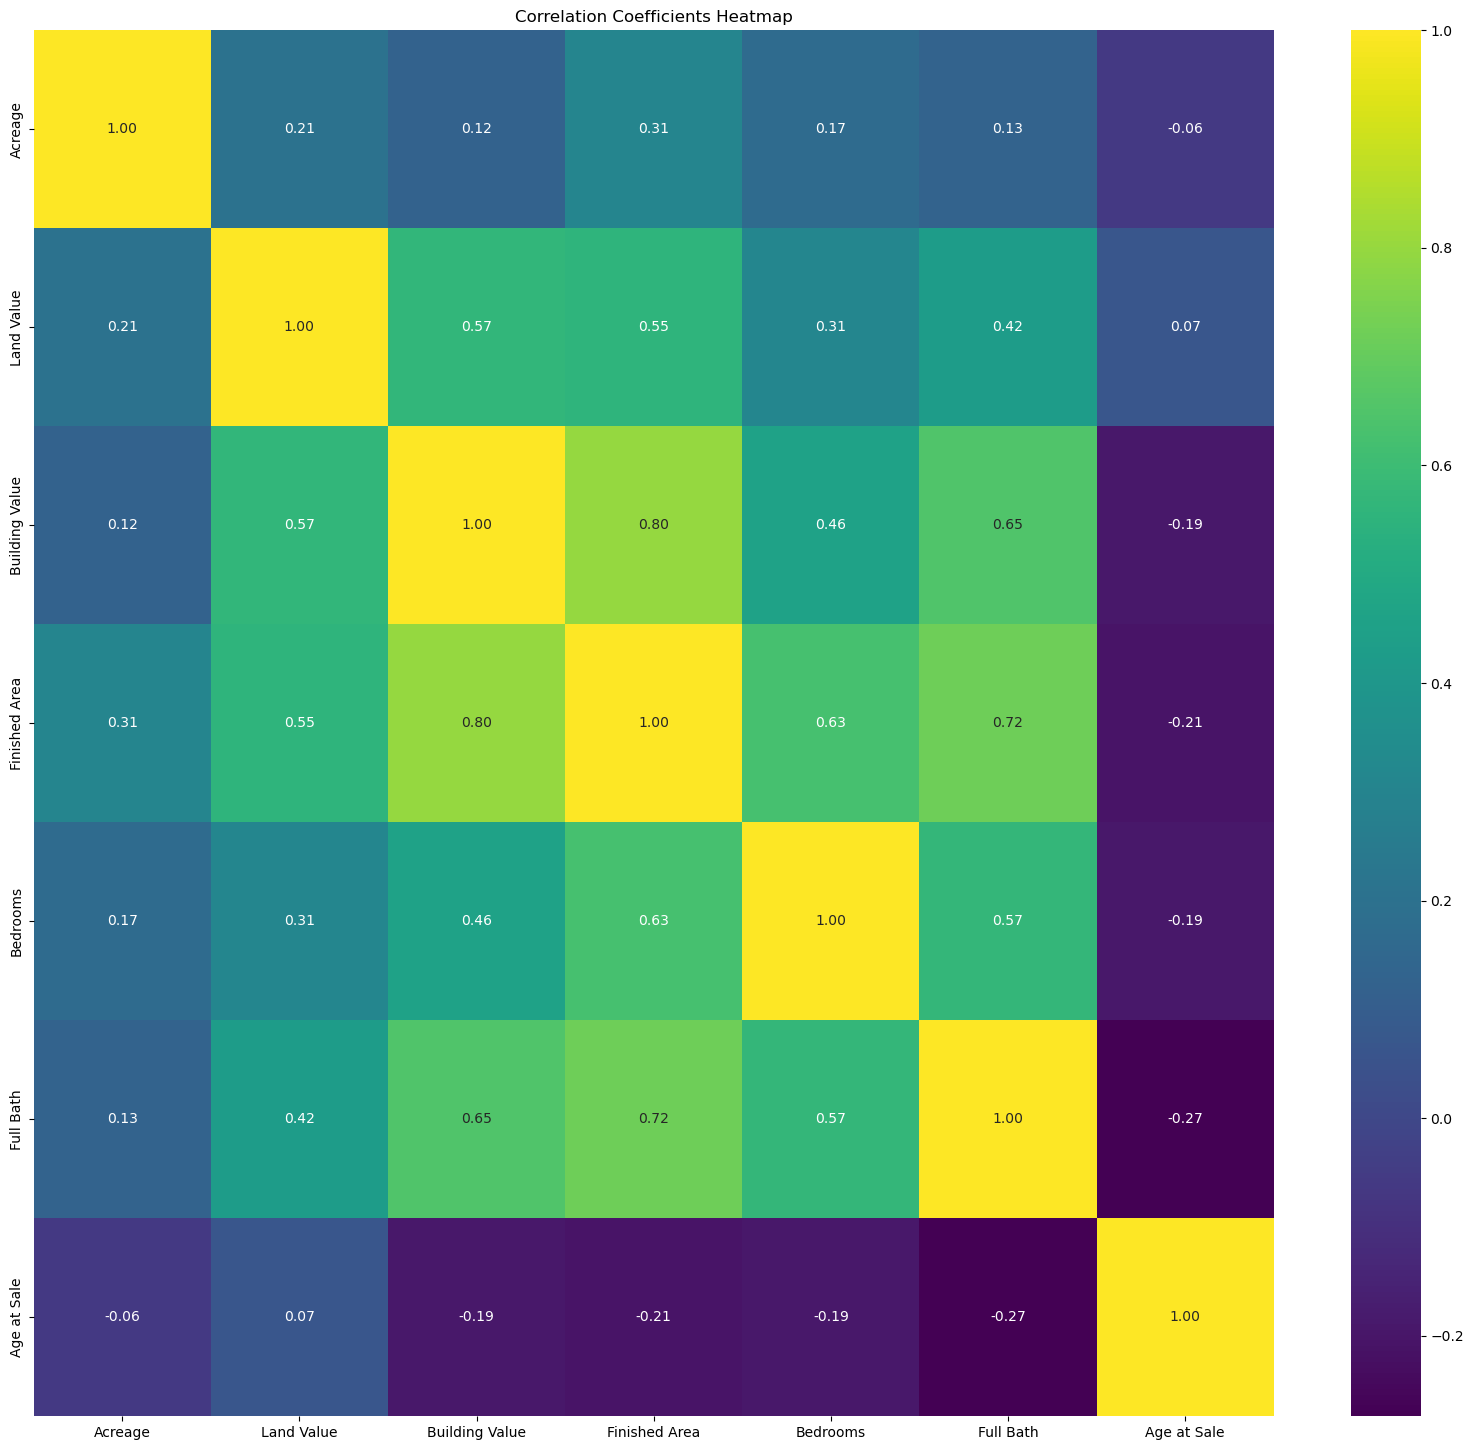

In [38]:
hmp = dfr_numeric.corr()
plt.figure(figsize=(20, 18))  # Adjust the size as needed
sns.heatmap(hmp, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Coefficients Heatmap')
plt.show()

In [39]:
# Function to calculate VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(dfr_numeric)
vif_result

,Variable,VIF
0,Acreage,4.775077
1,Land Value,4.972715
2,Building Value,15.691871
3,Finished Area,36.126163
4,Bedrooms,21.656816
5,Full Bath,16.466110
6,Age at Sale,4.768029


In [40]:
dfr.columns

Index(['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',
       'Acreage', 'Land Value', 'Building Value', 'Finished Area',
       'Foundation Type', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath',
       'Age at Sale', 'Sale Price Compared To Value'],
      dtype='object')

In [41]:
dfr_log = dfr.drop(['Finished Area','Full Bath', 'Bedrooms'], axis = 1)
dfr_numeric_log = dfr_log.select_dtypes(include="number")
vif_result = calculate_vif(dfr_numeric_log)
vif_result

,Variable,VIF
0,Acreage,3.616818
1,Land Value,4.809805
2,Building Value,5.485978
3,Age at Sale,3.373122


In [42]:
dfr_log

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Foundation Type,Exterior Wall,Grade,Age at Sale,Sale Price Compared To Value
0,SINGLE FAMILY,No,No,0.17,32000.0,134400.0,PT BSMT,BRICK,C,72.0,Over
2,SINGLE FAMILY,No,No,0.17,25000.0,243700.0,FULL BSMT,BRICK/FRAME,B,65.0,Under
3,SINGLE FAMILY,No,No,0.34,25000.0,138100.0,CRAWL,FRAME,C,95.0,Under
4,SINGLE FAMILY,No,No,0.17,25000.0,86100.0,CRAWL,FRAME,C,68.0,Under
5,SINGLE FAMILY,No,No,0.20,16000.0,68100.0,CRAWL,FRAME,D,81.0,Under
...,...,...,...,...,...,...,...,...,...,...,...
22631,SINGLE FAMILY,No,No,0.29,24000.0,106500.0,FULL BSMT,BRICK,C,51.0,Over
22632,SINGLE FAMILY,No,No,0.25,24000.0,104700.0,CRAWL,BRICK,C,44.0,Under
22634,SINGLE FAMILY,No,No,0.25,22500.0,107300.0,CRAWL,FRAME,C,29.0,Over
22649,SINGLE FAMILY,No,No,0.15,40000.0,204100.0,CRAWL,FRAME,B,12.0,Over


In [43]:
dfr = dfr[[col for col in dfr.columns if col != 'Sale Price Compared To Value'] + ['Sale Price Compared To Value']]

In [44]:
X_l = dfr_log.drop(columns=['Sale Price Compared To Value'])  # Features
y_l = dfr_log['Sale Price Compared To Value']  # Target variable

# Perform one-hot encoding on categorical variables
X_encoded_l = pd.get_dummies(X_l)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_l, y_l, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train_scaled, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

lr_cm = confusion_matrix(y_test, y_pred)
print(lr_cm)


Accuracy: 0.7644348894348895
              precision    recall  f1-score   support

        Over       0.76      1.00      0.87      2465
       Under       0.93      0.03      0.06       791

    accuracy                           0.76      3256
   macro avg       0.85      0.52      0.46      3256
weighted avg       0.80      0.76      0.67      3256

[[2463    2]
 [ 765   26]]


In [55]:
X = dfr.drop(columns=['Sale Price Compared To Value'])  # Features
y = dfr['Sale Price Compared To Value']  # Target variable

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
tree_y_pred = tree_model.predict(X_test_scaled)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, tree_y_pred)
print("Decision Tree Accuracy:", tree_accuracy)

# Print classification report
print(classification_report(y_test, tree_y_pred))

tree_cm = confusion_matrix(y_test, tree_y_pred)
print(tree_cm)

Decision Tree Accuracy: 0.6366707616707616
              precision    recall  f1-score   support

        Over       0.76      0.76      0.76      2465
       Under       0.25      0.25      0.25       791

    accuracy                           0.64      3256
   macro avg       0.50      0.50      0.50      3256
weighted avg       0.64      0.64      0.64      3256

[[1878  587]
 [ 596  195]]


In [54]:
X.columns

Index(['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',
       'Acreage', 'Land Value', 'Building Value', 'Finished Area',
       'Foundation Type', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath',
       'Age at Sale'],
      dtype='object')

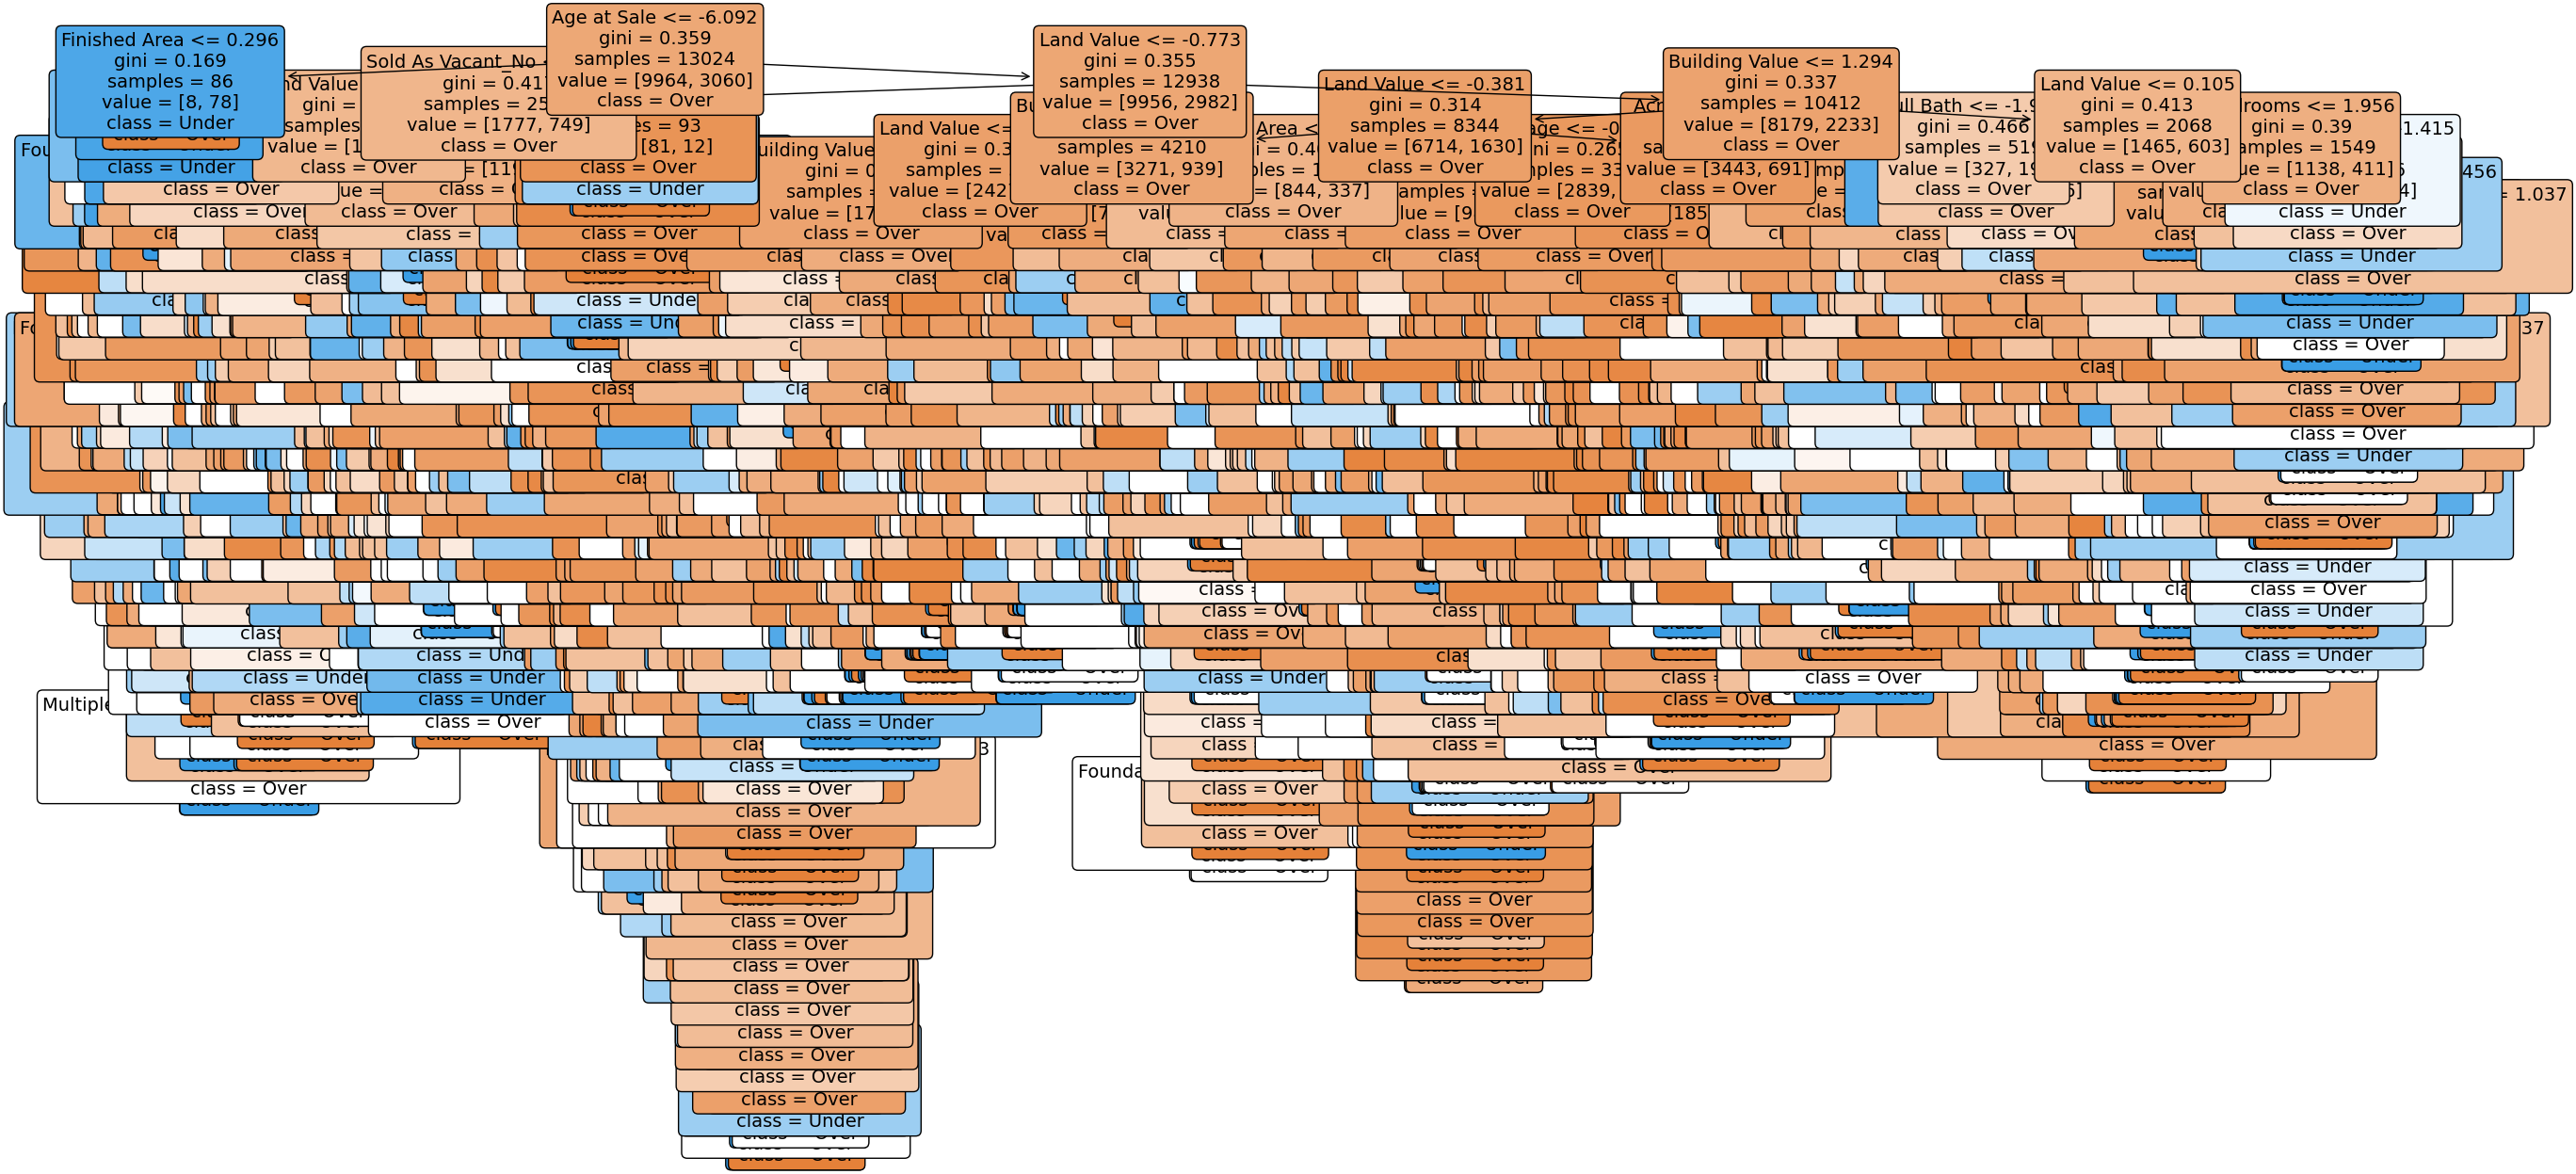

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert column names to a list
feature_names_list = X_encoded.columns.tolist()
feature_names_list

# Convert class names to a list
class_names_list = tree_model.classes_.tolist()

# Plot the decision tree
plt.figure(figsize=(30, 15))
plot_tree(tree_model, feature_names=feature_names_list, class_names=class_names_list, filled=True, rounded=True,fontsize=14)
plt.show()



In [48]:
# Extract feature importances from the decision tree model
feature_importances = tree_model.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names_list, feature_importances))

# Sort the dictionary by importances in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted features
total_features = len(sorted_features)
print(f"Total number of features: {total_features}\n")

for rank, (feature, importance) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: Feature: {feature}, Importance: {importance}")



Total number of features: 24

Rank 1: Feature: Building Value, Importance: 0.3087262701506038
Rank 2: Feature: Finished Area, Importance: 0.25205577067181
Rank 3: Feature: Acreage, Importance: 0.17406823600885923
Rank 4: Feature: Land Value, Importance: 0.10638637459411843
Rank 5: Feature: Age at Sale, Importance: 0.01854714197251353
Rank 6: Feature: Multiple Parcels Involved in Sale_No, Importance: 0.016310698173824904
Rank 7: Feature: Sold As Vacant_Yes, Importance: 0.016304146451977426
Rank 8: Feature: Foundation Type_FULL BSMT, Importance: 0.014642644052266326
Rank 9: Feature: Multiple Parcels Involved in Sale_Yes, Importance: 0.013409421040024102
Rank 10: Feature: Foundation Type_SLAB, Importance: 0.011730997794037147
Rank 11: Feature: Foundation Type_PT BSMT, Importance: 0.009696052871053327
Rank 12: Feature: Bedrooms, Importance: 0.007927499909296127
Rank 13: Feature: Exterior Wall_FRAME, Importance: 0.007742103794953237
Rank 14: Feature: Exterior Wall_STONE, Importance: 0.00771

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest classifier
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
forest_y_pred = forest_model.predict(X_test_scaled)

# Evaluate the model
forest_accuracy = accuracy_score(y_test, forest_y_pred)
print("Random Forest Accuracy:", forest_accuracy)

# Print classification report
print(classification_report(y_test, forest_y_pred))

forest_cm = confusion_matrix(y_test, forest_y_pred)
print(forest_cm)


Random Forest Accuracy: 0.7122235872235873
              precision    recall  f1-score   support

        Over       0.76      0.90      0.83      2465
       Under       0.29      0.13      0.18       791

    accuracy                           0.71      3256
   macro avg       0.53      0.51      0.50      3256
weighted avg       0.65      0.71      0.67      3256

[[2219  246]
 [ 691  100]]


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
gb_y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Print classification report
print(classification_report(y_test, gb_y_pred))

gb_cm = confusion_matrix(y_test, gb_y_pred)
print(gb_cm)


Gradient Boosting Accuracy: 0.7653562653562653
              precision    recall  f1-score   support

        Over       0.76      1.00      0.87      2465
       Under       0.85      0.04      0.08       791

    accuracy                           0.77      3256
   macro avg       0.81      0.52      0.47      3256
weighted avg       0.78      0.77      0.67      3256

[[2459    6]
 [ 758   33]]


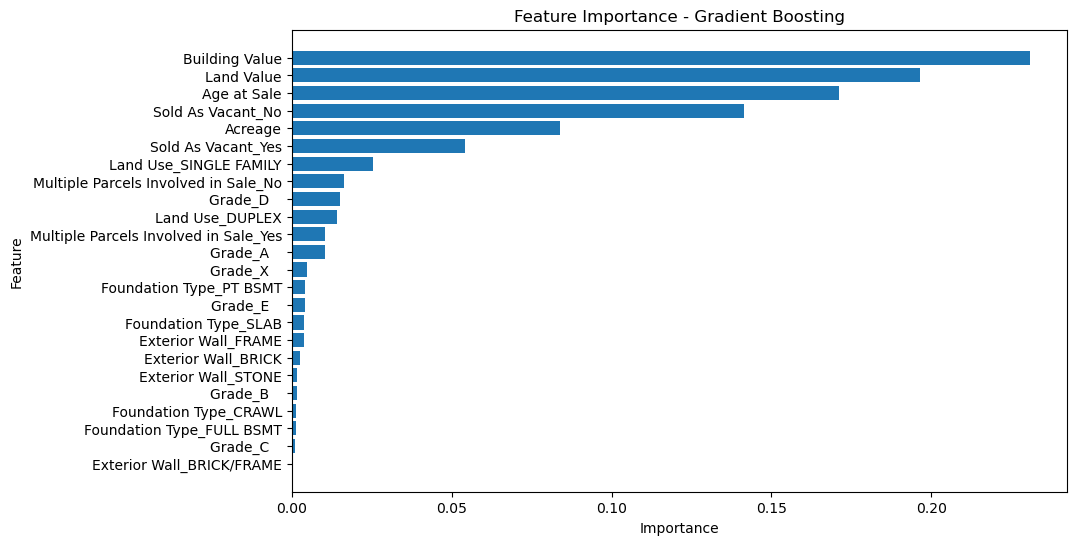

In [60]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to associate feature names with importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Gradient Boosting')
plt.show()


In [62]:
# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances in a tabular format
print(sorted_feature_importances)


                                  Feature  Importance
2                          Building Value    0.230732
1                              Land Value    0.196416
3                             Age at Sale    0.171213
6                       Sold As Vacant_No    0.141391
0                                 Acreage    0.083869
7                      Sold As Vacant_Yes    0.054268
5                  Land Use_SINGLE FAMILY    0.025446
8    Multiple Parcels Involved in Sale_No    0.016349
21                             Grade_D       0.015108
4                         Land Use_DUPLEX    0.014125
9   Multiple Parcels Involved in Sale_Yes    0.010414
18                             Grade_A       0.010301
23                             Grade_X       0.004732
12                Foundation Type_PT BSMT    0.004250
22                             Grade_E       0.004084
13                   Foundation Type_SLAB    0.003887
16                    Exterior Wall_FRAME    0.003840
14                    Exteri

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, pos_label='Under')
lr_recall = recall_score(y_test, y_pred, pos_label='Under')
lr_f1_score = f1_score(y_test, y_pred, pos_label='Under')
lr_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

# Decision Tree
tree_accuracy = accuracy_score(y_test, tree_y_pred)
tree_precision = precision_score(y_test, tree_y_pred, pos_label='Under')
tree_recall = recall_score(y_test, tree_y_pred, pos_label='Under')
tree_f1_score = f1_score(y_test, tree_y_pred, pos_label='Under')
tree_roc_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test_scaled)[:, 1])

# Random Forest
forest_accuracy = accuracy_score(y_test, forest_y_pred)
forest_precision = precision_score(y_test, forest_y_pred, pos_label='Under')
forest_recall = recall_score(y_test, forest_y_pred, pos_label='Under')
forest_f1_score = f1_score(y_test, forest_y_pred, pos_label='Under')
forest_roc_auc = roc_auc_score(y_test, forest_model.predict_proba(X_test_scaled)[:, 1])

# Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred, pos_label='Under')
gb_recall = recall_score(y_test, gb_y_pred, pos_label='Under')
gb_f1_score = f1_score(y_test, gb_y_pred, pos_label='Under')
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])

# Display the metrics
print("Metric\t\tLogistic Regression\tDecision Tree\tRandom Forest\tGradient Boosting")
print("Accuracy\t{:.4f}\t\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(lr_accuracy, tree_accuracy, forest_accuracy, gb_accuracy))
print("Precision\t{:.4f}\t\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(lr_precision, tree_precision, forest_precision, gb_precision))
print("Recall\t\t{:.4f}\t\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(lr_recall, tree_recall, forest_recall, gb_recall))
print("F1 Score\t{:.4f}\t\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(lr_f1_score, tree_f1_score, forest_f1_score, gb_f1_score))
print("ROC-AUC\t\t{:.4f}\t\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(lr_roc_auc, tree_roc_auc, forest_roc_auc, gb_roc_auc))



Metric		Logistic Regression	Decision Tree	Random Forest	Gradient Boosting
Accuracy	0.7644			0.6367		0.7122		0.7654
Precision	0.9286			0.2494		0.2890		0.8462
Recall		0.0329			0.2465		0.1264		0.0417
F1 Score	0.0635			0.2479		0.1759		0.0795
ROC-AUC		0.5875			0.5085		0.5394		0.6213


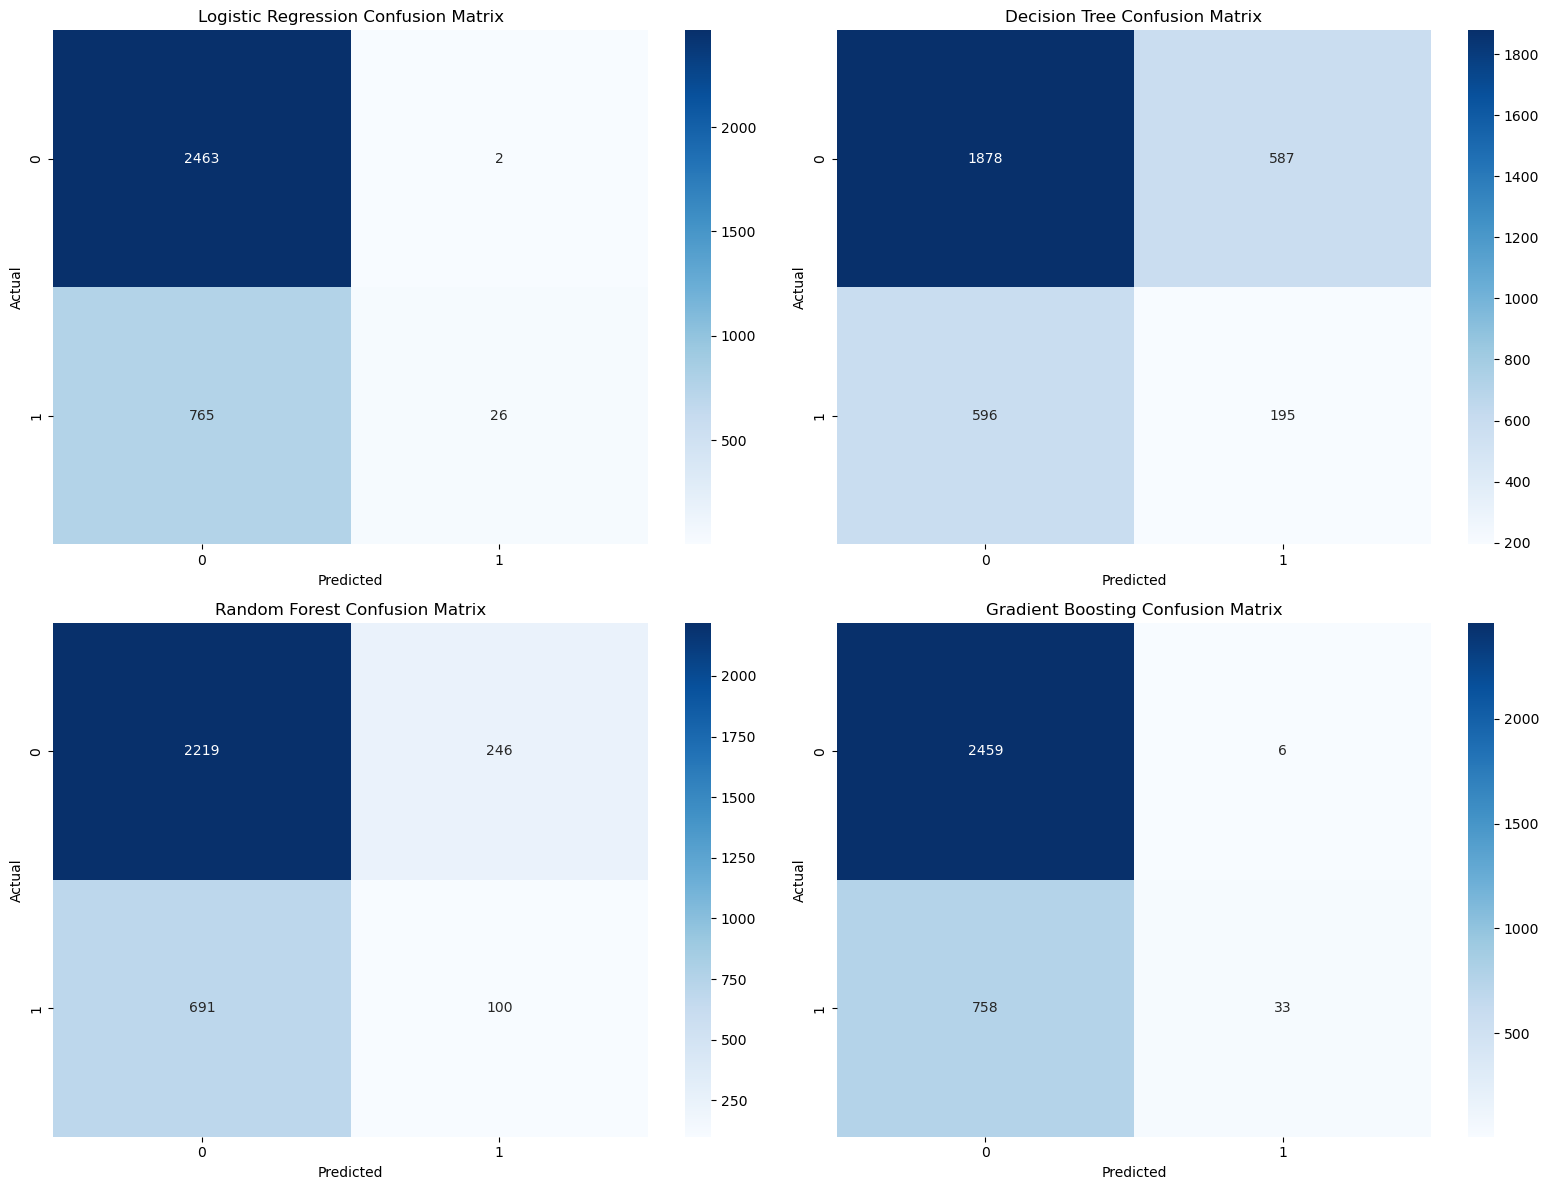

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
lr_cm = confusion_matrix(y_test, y_pred)

# Decision Tree
tree_cm = confusion_matrix(y_test, tree_y_pred)

# Random Forest
forest_cm = confusion_matrix(y_test, forest_y_pred)

# Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_y_pred)

# Plot confusion matrices
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(tree_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 3)
sns.heatmap(forest_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 4)
sns.heatmap(gb_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
